In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dowhy

In [2]:
raw_data = pd.read_csv('data and supplements/dataverse_files/Eyeglasses_China.TAB', delimiter='\t')
raw_data = raw_data[(raw_data['attrition'] == 0) & (raw_data['baseusage'] == 0)]
raw_data = raw_data.drop(['reexamination', 'schid', 'givegl', 'baseusage', 'studentid', 'newcome', 'attrition', 'con', 'vou', 'fre', 'interaction'], axis=1, inplace=False).dropna()
categorical_features = ['RE2', 'hhwealth', 'seatchange', 'emtea_14', 'blackboard']
raw_data.columns

Index(['age', 'male', 'aware0', 'harmvision0', 'gansu', 'RE2', 'va18', 'zmath',
       'pedu12', 'hhwealth', 'bboarding', 'pamigrant', 'wear2', 'use2',
       'ezmath', 'major', 'edu', 'SE2', 'seatchange', 'emtea_14',
       'blackboard'],
      dtype='object')

In [3]:
raw_data = pd.get_dummies(raw_data, columns=categorical_features)
columns = [col for col in raw_data.columns if col not in ('major', 'ezmath')] + ['major', 'ezmath']
raw_data = raw_data[columns]
raw_data

,age,male,aware0,harmvision0,gansu,va18,zmath,pedu12,bboarding,pamigrant,...,emtea_14_1.0,emtea_14_2.0,emtea_14_3.0,emtea_14_4.0,emtea_14_5.0,blackboard_1.0,blackboard_2.0,blackboard_3.0,major,ezmath
0,10.0,1,1.0,0,0,1,0.403494,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,3,0.583470
1,8.0,0,1.0,1,0,0,2.023282,1.0,0.0,0.0,...,0,1,0,0,0,0,0,1,3,2.203259
2,9.0,1,1.0,0,0,1,-1.756224,0.0,1.0,0.0,...,0,1,0,0,0,0,0,1,3,-0.496389
3,11.0,0,1.0,1,0,1,-0.496389,1.0,1.0,0.0,...,0,1,0,0,0,0,0,1,3,0.763447
4,11.0,1,0.0,0,0,0,-1.216294,0.0,1.0,0.0,...,0,1,0,0,0,0,0,1,3,-0.496389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,9.0,1,0.0,1,1,0,0.883653,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,2,1.068199
3171,13.0,0,0.0,0,1,1,-1.216294,1.0,0.0,0.0,...,0,1,0,0,0,0,0,1,3,-1.036318
3172,13.0,1,0.0,0,1,0,0.699107,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,3,0.514560
3174,10.0,1,0.0,0,1,0,1.252746,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,3,0.699107


### Filtering the data
To try and better estimate the effect of wearing glasses on math tests performance, we did the following:
1. For the control group, we only left students who reported that they did not wear glasses and that at a random check were found not to be wearing glasses.
2. For the free glasses and voucher groups who together form the treatment group, we only left students who reported that they did wear glasses and at a random check were found to be wearing glasses.

In [4]:
control_data = raw_data[(raw_data['major'] == 1) & (raw_data['wear2'] == 0) & (raw_data['use2'] == 0)].drop(['wear2', 'use2'], axis=1, inplace=False).reset_index(drop=True)
control_data['major'] = 0
control_data

,age,male,aware0,harmvision0,gansu,va18,zmath,pedu12,bboarding,pamigrant,...,emtea_14_1.0,emtea_14_2.0,emtea_14_3.0,emtea_14_4.0,emtea_14_5.0,blackboard_1.0,blackboard_2.0,blackboard_3.0,major,ezmath
0,9.0,1,0.0,0,0,0,0.043541,0.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,0.403494
1,9.0,0,1.0,0,0,0,-0.676365,0.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,-0.496389
2,10.0,1,1.0,0,0,0,0.043541,0.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,-0.496389
3,11.0,1,0.0,1,0,0,-0.592717,0.0,1.0,0.0,...,0,0,1,0,0,0,1,0,0,-0.592717
4,10.0,0,0.0,1,0,0,-1.146357,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,-1.884542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,9.0,0,0.0,0,1,1,0.403494,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0.943423
551,10.0,0,0.0,1,1,0,0.883653,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,1.621839
552,11.0,1,0.0,0,1,1,1.068199,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0.699107
553,15.0,1,0.0,1,1,1,-0.961810,0.0,0.0,1.0,...,0,1,0,0,0,0,0,1,0,-1.146357


In [5]:
voucher_data = raw_data[(raw_data['major'] == 2) & (raw_data['wear2'] == 1) & (raw_data['use2'] == 1)]
voucher_data

,age,male,aware0,harmvision0,gansu,va18,zmath,pedu12,bboarding,pamigrant,...,emtea_14_1.0,emtea_14_2.0,emtea_14_3.0,emtea_14_4.0,emtea_14_5.0,blackboard_1.0,blackboard_2.0,blackboard_3.0,major,ezmath
138,10.0,0,1.0,1,0,1,0.145468,1.0,1.0,0.0,...,0,1,0,0,0,0,0,1,2,-0.592717
139,10.0,1,1.0,0,0,0,-0.676365,0.0,0.0,1.0,...,0,0,0,1,0,1,0,0,2,-0.856341
140,9.0,1,1.0,0,0,1,-0.496389,0.0,0.0,0.0,...,0,0,0,1,0,1,0,0,2,-0.316412
152,11.0,0,1.0,0,0,0,0.330014,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,2,-1.515449
220,11.0,0,0.0,0,0,1,0.583470,0.0,0.0,0.0,...,0,0,0,1,0,1,0,0,2,0.403494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,9.0,1,0.0,0,1,0,0.403494,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,2,2.023282
3163,9.0,0,0.0,1,1,0,0.403494,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,2,0.583470
3164,9.0,0,0.0,1,1,0,0.763447,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,2,0.403494
3167,10.0,0,1.0,1,1,1,1.068199,1.0,0.0,0.0,...,0,1,0,0,0,0,0,1,2,1.252746


In [6]:
free_data = raw_data[(raw_data['major'] == 3) & (raw_data['wear2'] == 1) & (raw_data['use2'] == 1)]
free_data

,age,male,aware0,harmvision0,gansu,va18,zmath,pedu12,bboarding,pamigrant,...,emtea_14_1.0,emtea_14_2.0,emtea_14_3.0,emtea_14_4.0,emtea_14_5.0,blackboard_1.0,blackboard_2.0,blackboard_3.0,major,ezmath
0,10.0,1,1.0,0,0,1,0.403494,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,3,0.583470
3,11.0,0,1.0,1,0,1,-0.496389,1.0,1.0,0.0,...,0,1,0,0,0,0,0,1,3,0.763447
10,10.0,1,0.0,1,0,1,0.514560,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,3,-0.408171
11,11.0,1,1.0,0,0,1,1.621839,0.0,1.0,0.0,...,1,0,0,0,0,0,0,1,3,1.437292
14,10.0,1,1.0,0,0,1,0.145468,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,3,-0.408171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,12.0,0,1.0,1,1,1,-0.223625,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,3,0.514560
3014,12.0,1,0.0,1,1,1,-0.592717,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,3,-0.777264
3020,11.0,1,0.0,0,1,0,0.514560,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,3,0.330014
3147,9.0,0,0.0,0,1,1,-0.316412,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,3,1.303376


In [7]:
treatment_data = voucher_data.append(free_data).reset_index(drop=True).drop(['wear2', 'use2'], axis=1, inplace=False).reset_index(drop=True)
treatment_data['major'] = 1
treatment_data

,age,male,aware0,harmvision0,gansu,va18,zmath,pedu12,bboarding,pamigrant,...,emtea_14_1.0,emtea_14_2.0,emtea_14_3.0,emtea_14_4.0,emtea_14_5.0,blackboard_1.0,blackboard_2.0,blackboard_3.0,major,ezmath
0,10.0,0,1.0,1,0,1,0.145468,1.0,1.0,0.0,...,0,1,0,0,0,0,0,1,1,-0.592717
1,10.0,1,1.0,0,0,0,-0.676365,0.0,0.0,1.0,...,0,0,0,1,0,1,0,0,1,-0.856341
2,9.0,1,1.0,0,0,1,-0.496389,0.0,0.0,0.0,...,0,0,0,1,0,1,0,0,1,-0.316412
3,11.0,0,1.0,0,0,0,0.330014,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,-1.515449
4,11.0,0,0.0,0,0,1,0.583470,0.0,0.0,0.0,...,0,0,0,1,0,1,0,0,1,0.403494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,12.0,0,1.0,1,1,1,-0.223625,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,0.514560
478,12.0,1,0.0,1,1,1,-0.592717,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,-0.777264
479,11.0,1,0.0,0,1,0,0.514560,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,0.330014
480,9.0,0,0.0,0,1,1,-0.316412,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,1.303376


In [8]:
data = control_data.append(treatment_data).reset_index(drop=True)
data

,age,male,aware0,harmvision0,gansu,va18,zmath,pedu12,bboarding,pamigrant,...,emtea_14_1.0,emtea_14_2.0,emtea_14_3.0,emtea_14_4.0,emtea_14_5.0,blackboard_1.0,blackboard_2.0,blackboard_3.0,major,ezmath
0,9.0,1,0.0,0,0,0,0.043541,0.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,0.403494
1,9.0,0,1.0,0,0,0,-0.676365,0.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,-0.496389
2,10.0,1,1.0,0,0,0,0.043541,0.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,-0.496389
3,11.0,1,0.0,1,0,0,-0.592717,0.0,1.0,0.0,...,0,0,1,0,0,0,1,0,0,-0.592717
4,10.0,0,0.0,1,0,0,-1.146357,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,-1.884542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,12.0,0,1.0,1,1,1,-0.223625,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,0.514560
1033,12.0,1,0.0,1,1,1,-0.592717,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,-0.777264
1034,11.0,1,0.0,0,1,0,0.514560,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,0.330014
1035,9.0,0,0.0,0,1,1,-0.316412,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,1.303376


<AxesSubplot:>

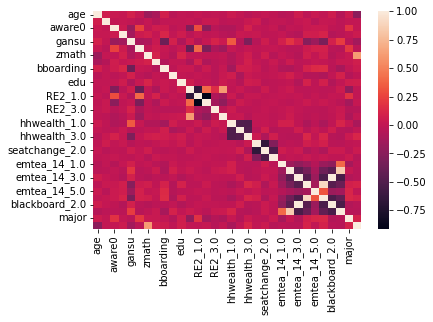

In [9]:
import seaborn as sns
sns.heatmap(data.corr())

### Propensity scoring

In [10]:
# propensity scores
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = data.iloc[:, :-2], data['major']
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X, y)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

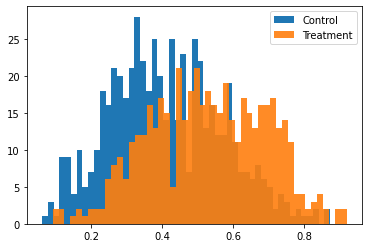

In [11]:
prop1 = [p for p, l in zip(pipe.predict_proba(X)[:, 1].tolist(), y.tolist()) if l]
prop2 = [p for p, l in zip(pipe.predict_proba(X)[:, 1].tolist(), y.tolist()) if not l]

plt.hist(prop2, bins=50, label='Control')
plt.hist(prop1, bins=50, alpha=0.9, label='Treatment')
plt.legend()
plt.show()

### ATE calculations
#### Bootstraping

In [12]:
def cosine(x, y):
    t = x.to_numpy()
    s = y.to_numpy()
    return np.dot(t, s)/(np.linalg.norm(t)*np.linalg.norm(s))

In [13]:
from sklearn.linear_model import LinearRegression

B = 100
N = 1000
T_ATE_list = []
S_ATE_list = []
Matching_ATE_list = []
IPW_ATE_list = []

for _ in range(N):
    control_data_b = control_data.sample(B)
    treatment_data_b = treatment_data.sample(B)
    data_b = control_data_b.append(treatment_data_b).reset_index(drop=True)
    
    
    # T-learner
    X_0, y_0 = control_data_b.iloc[:, :-2], control_data_b['ezmath']
    X_1, y_1 = treatment_data_b.iloc[:, :-2], treatment_data_b['ezmath']
    T_reg_model_0 = LinearRegression().fit(X_0, y_0)
    T_reg_model_1 = LinearRegression().fit(X_1, y_1)
    T_ATE_b = np.mean(T_reg_model_1.predict(X_1) - T_reg_model_0.predict(X_0))
    T_ATE_list.append(T_ATE_b)
    
    # S-learner
    X_0, y_0 = control_data_b.iloc[:, :-1], control_data_b['ezmath']
    X_1, y_1 = treatment_data_b.iloc[:, :-1], treatment_data_b['ezmath']
    X, y = data_b.iloc[:, :-1], data_b['ezmath']
    S_reg_model = LinearRegression().fit(X, y)
    S_ATE_b = np.mean(S_reg_model.predict(X_1) - S_reg_model.predict(X_0))
    S_ATE_list.append(S_ATE_b)
    
    
    # 1-NN matching
    ite = 0
    idx_to_sample_not_treated = [(i, sample) for i, sample in control_data_b.iterrows()]
    for j, x in treatment_data_b.iterrows():
        nearest_idx = sorted([(cosine(x, sample), i) for i, sample in idx_to_sample_not_treated])[-1][1]
        ite += y_1[j] - y_0[nearest_idx]
    idx_to_sample_treated = [(i, sample) for i, sample in treatment_data_b.iterrows()]
    for j, x in control_data_b.iterrows():
        nearest_idx = sorted([(cosine(x, sample), i) for i, sample in idx_to_sample_treated])[-1][1]
        ite += y_1[nearest_idx] - y_0[j]
    Matching_ATE_b = ite / (2*B)
    Matching_ATE_list.append(Matching_ATE_b)
    
    
    # IPW
    X, y = data_b.iloc[:, :-2], data_b['major']
    pipe = make_pipeline(StandardScaler(), LogisticRegression())
    pipe.fit(X, y)
    e = pipe.predict_proba(X)[:, 1]
    IPW_ATE_b = np.sum(data_b['major']*data_b['ezmath']/e - ((1-data_b['major'])*data_b['ezmath']/(1-e)))/(2*B)
    IPW_ATE_list.append(IPW_ATE_b)

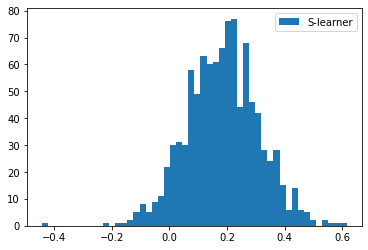

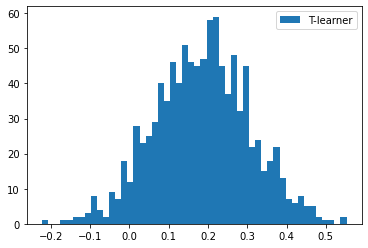

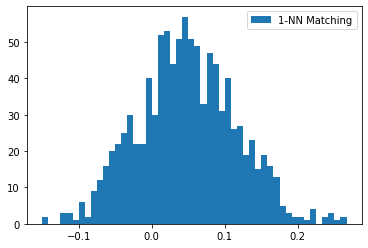

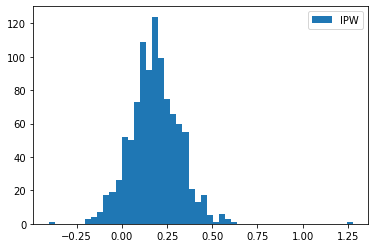

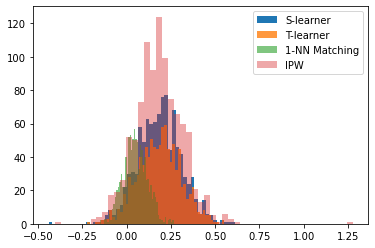

In [14]:
plt.hist(S_ATE_list, bins=50, label='S-learner')
plt.legend()
plt.show()
plt.hist(T_ATE_list, bins=50, label='T-learner')
plt.legend()
plt.show()
plt.hist(Matching_ATE_list, bins=50, label='1-NN Matching')
plt.legend()
plt.show()
plt.hist(IPW_ATE_list, bins=50, label='IPW')
plt.legend()
plt.show()

plt.hist(S_ATE_list, bins=50, label='S-learner')
plt.hist(T_ATE_list, bins=50, alpha=0.8, label='T-learner')
plt.hist(Matching_ATE_list, bins=50, alpha=0.6, label='1-NN Matching')
plt.hist(IPW_ATE_list, bins=50, alpha=0.4, label='IPW')
plt.legend()
plt.show()

In [15]:
approaches = [S_ATE_list, T_ATE_list, Matching_ATE_list, IPW_ATE_list]
for a in approaches:
    a = sorted(a)
    mean = sum(a)/len(a)
    std = np.std(np.array(a))
    CI = (a[25], a[975])
    print('*'*50)
    print(mean)
    print(std)
    print(CI)

**************************************************
0.18548258144645638
0.12454736821345008
(-0.04976696447000101, 0.4348604283900002)
**************************************************
0.1848023497102298
0.12108921576556943
(-0.049746396139999635, 0.42858010878000047)
**************************************************
0.04838314515762003
0.06756674548195028
(-0.07646601618500003, 0.17778303116000008)
**************************************************
0.1822400482805168
0.13733179664072526
(-0.0788159100376615, 0.458046657810667)


<AxesSubplot:>

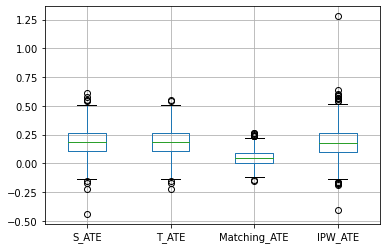

In [16]:
res = pd.DataFrame({'S_ATE': S_ATE_list,
                   'T_ATE': T_ATE_list,
                   'Matching_ATE': Matching_ATE_list,
                   'IPW_ATE': IPW_ATE_list})
res.boxplot()

### PGM approach

In [17]:
raw_data = pd.read_csv('data and supplements/dataverse_files/Eyeglasses_China.TAB', delimiter='\t')
raw_data = raw_data[(raw_data['attrition'] == 0) & (raw_data['baseusage'] == 0)]
raw_data = raw_data.drop(['SE2', 'reexamination', 'schid', 'givegl', 'baseusage', 'studentid', 'newcome', 'attrition', 'con', 'vou', 'fre', 'interaction'], axis=1, inplace=False).dropna()
categorical_features = ['RE2', 'hhwealth', 'seatchange', 'emtea_14', 'blackboard']
for f in categorical_features:
    raw_data[f] = raw_data[f].astype(str)

control_data = raw_data[(raw_data['major'] == 1) & (raw_data['wear2'] == 0) & (raw_data['use2'] == 0)].drop(['wear2', 'use2'], axis=1, inplace=False).reset_index(drop=True)
control_data['major'] = 0
voucher_data = raw_data[(raw_data['major'] == 2) & (raw_data['wear2'] == 1) & (raw_data['use2'] == 1)]
free_data = raw_data[(raw_data['major'] == 3) & (raw_data['wear2'] == 1) & (raw_data['use2'] == 1)]
treatment_data = voucher_data.append(free_data).reset_index(drop=True).drop(['wear2', 'use2'], axis=1, inplace=False).reset_index(drop=True)
treatment_data['major'] = 1
data = control_data.append(treatment_data).reset_index(drop=True)
data

,age,male,aware0,harmvision0,gansu,RE2,va18,zmath,pedu12,hhwealth,bboarding,pamigrant,ezmath,major,edu,seatchange,emtea_14,blackboard
0,9.0,1,0.0,0,0,2.0,0,0.043541,0.0,2.0,1.0,0.0,0.403494,0,0,2.0,4.0,1.0
1,9.0,0,1.0,0,0,2.0,0,-0.676365,0.0,2.0,1.0,0.0,-0.496389,0,0,1.0,4.0,1.0
2,10.0,1,1.0,0,0,1.0,0,0.043541,0.0,3.0,1.0,0.0,-0.496389,0,0,2.0,4.0,1.0
3,11.0,1,0.0,1,0,2.0,0,-0.592717,0.0,1.0,1.0,0.0,-0.592717,0,0,2.0,3.0,2.0
4,10.0,0,0.0,1,0,2.0,0,-1.146357,0.0,2.0,0.0,0.0,-1.884542,0,0,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,12.0,0,1.0,1,1,2.0,1,-0.223625,0.0,2.0,0.0,0.0,0.514560,1,1,2.0,2.0,3.0
1033,12.0,1,0.0,1,1,2.0,1,-0.592717,0.0,1.0,0.0,0.0,-0.777264,1,1,2.0,2.0,3.0
1034,11.0,1,0.0,0,1,2.0,0,0.514560,0.0,1.0,0.0,0.0,0.330014,1,1,2.0,2.0,3.0
1035,9.0,0,0.0,0,1,2.0,1,-0.316412,0.0,1.0,0.0,0.0,1.303376,1,1,2.0,2.0,3.0


In [18]:
data.columns

Index(['age', 'male', 'aware0', 'harmvision0', 'gansu', 'RE2', 'va18', 'zmath',
       'pedu12', 'hhwealth', 'bboarding', 'pamigrant', 'ezmath', 'major',
       'edu', 'seatchange', 'emtea_14', 'blackboard'],
      dtype='object')

In [19]:
# Creating the causal graph
#U[label="Unobserved Confounders"];
causal_graph = """
digraph {
aware0;
harmvision0;
gansu;
RE2;
va18;
zmath;
pedu12;
hhwealth;
bboarding;
pamigrant;
ezmath;
major;
edu;
seatchange;
emtea_14;
blackboard;
aware0 -> seatchange;
harmvision0 -> major;
gansu -> hhwealth;
gansu -> pamigrant;
gansu -> pedu12;
pedu12 -> aware0;
pedu12 -> harmvision0;
pedu12 -> pamigrant;
pedu12 -> hhwealth;
pedu12 -> zmath;
pedu12 -> ezmath;
hhwealth -> bboarding;
hhwealth -> zmath;
hhwealth -> ezmath;
pamigrant -> bboarding;
pamigrant -> aware0;
pamigrant -> hhwealth;
pamigrant -> zmath;
pamigrant -> ezmath;
edu -> major;
emtea_14 -> zmath;
emtea_14 -> ezmath;
zmath -> ezmath;
blackboard -> zmath;
blackboard -> ezmath;
major -> ezmath;
major -> seatchange;
RE2 -> ezmath;
RE2 -> major;
RE2 -> va18;
va18 -> seatchange;
}
""".replace("\n", " ")

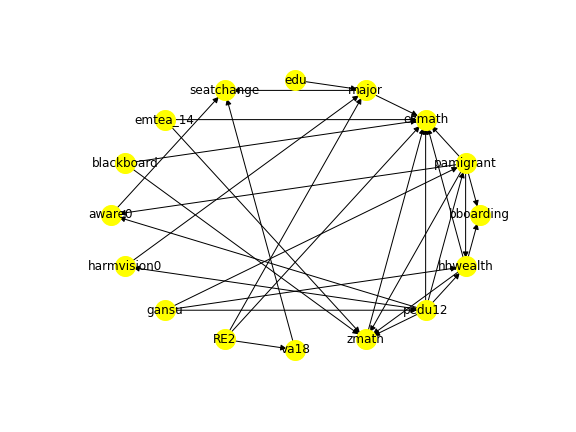

In [20]:
from dowhy import CausalModel
from IPython.display import Image, display

model= CausalModel(
        data = data,
        graph=causal_graph,
        treatment='major',
        outcome='ezmath')
# model.view_model()
display(Image(filename="causal_model.png"))

In [21]:
#Identify the causal effect
estimands = model.identify_effect()
print(estimands)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                         
────────(Expectation(ezmath|RE2,harmvision0))
d[major]                                     
Estimand assumption 1, Unconfoundedness: If U→{major} and U→ezmath then P(ezmath|major,RE2,harmvision0,U) = P(ezmath|major,RE2,harmvision0)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(ezmath, [edu])*Derivative([major], [edu])**(-1))
Estimand assumption 1, As-if-random: If U→→ezmath then ¬(U →→{edu})
Estimand assumption 2, Exclusion: If we remove {edu}→{major}, then ¬({edu}→ezmath)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [22]:
# Causal Effect Estimation
estimate = model.estimate_effect(estimands, method_name = "backdoor.propensity_score_weighting")
print(estimate)

propensity_score_weighting
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                         
────────(Expectation(ezmath|RE2,harmvision0))
d[major]                                     
Estimand assumption 1, Unconfoundedness: If U→{major} and U→ezmath then P(ezmath|major,RE2,harmvision0,U) = P(ezmath|major,RE2,harmvision0)

## Realized estimand
b: ezmath~major+RE2+harmvision0
Target units: ate

## Estimate
Mean value: 0.1904728624107466



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
estimate.get_confidence_intervals(confidence_level=0.95)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [24]:
refutel = model.refute_estimate(estimands, estimate, "random_common_cause")
print(refutel)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Refute: Add a random common cause
Estimated effect:0.1904728624107466
New effect:0.19027233524949788
p value:0.8799999999999999



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [25]:
refutel = model.refute_estimate(estimands, estimate, "data_subset_refuter")
print(refutel)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Refute: Use a subset of data
Estimated effect:0.1904728624107466
New effect:0.1959024205485855
p value:1.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
